# Уравнение с доски

In [3]:
from sympy import *

x1, x2, x =symbols('x1 x2 x')
e = 0.3
alpha = 1
X = (1, 0)

def f(x1, x2):
    return x1**2 + 2 * x2**2 - 4 * x1 + 2 * x2

di_1 = lambda y: diff(f(x1, x2), x1).subs(x1, y)
di_2 = lambda y: diff(f(x1, x2), x2).subs(x2, y)

def dist(x1, x2):
    return ((x1**2)+(x2**2))**0.5

k = 0

while True:
    if dist(di_1(X[0]), di_2(X[1])) < e:
        print (X)
        break
    else:
        z = (X[0] - alpha * di_1(X[0])/dist(di_1(X[0]), di_2(X[1])) , X[1] - alpha * di_2(X[1])/dist(di_1(X[0]), di_2(X[1])) )
        if f(z[0],z[1]) < f(X[0],X[1]):
            X = z
        else:
            alpha = alpha / 2
    k += 1 
        
print (f(X[0],X[1]), k)

(1.99840311290444, -0.548844748996298)
-4.49522583094258 5


# Уравнение из методички

In [1]:
from sympy import *

x1, x2, x =symbols('x1 x2 x')
e = 0.01
alpha = 1
X = (1, 1)
k = 0

def f(x1, x2):
    return 2 * x1**2 + 5 * x2**2 + x1 * x2 - 3 * x1 - x2 + 5

def di_1(y, p):
    return diff(f(x1, x2), x1).subs(x1,y).subs(x2,p)

def di_2(y, p):
    return diff(f(x1, x2), x2).subs(x1, y).subs(x2,p)

def dist(x1, x2):
    return ((x1**2)+(x2**2))**0.5

z = (X[0] - alpha * di_1(X[0], X[1])/dist(di_1(X[0],X[1]), di_2(X[0], X[1])) , X[1] - alpha * di_2(X[0], X[1])/dist(di_1(X[0], X[1]), di_2(X[0], X[1])) )

while True:
    if dist(di_1(X[0], X[1]), di_2(X[0], X[1])) < e:
        print (X)
        break
    else:
        z = (X[0] - alpha * di_1(X[0], X[1])/dist(di_1(X[0], X[1]), di_2(X[0], X[1])) , X[1] - alpha * di_2(X[0], X[1])/dist(di_1(X[0], X[1]), di_2(X[0], X[1])) )
        if f(z[0],z[1]) < f(X[0],X[1]):
            X = z
        else:
            alpha = alpha / 2
    k += 1
        
print (f(X[0],X[1]), k)

(0.743191850301562, 0.0255666144896438)
3.87179524572580 13


# Метод Хука-Дживса

In [2]:
x = [5, 4]
x1 = [5, 4]
h = [1, 1]
e = 0.01
k = 0
def f(x1, x2):
    return 2 * x1**2 + 5 * x2**2 + x1 * x2 - 3 * x1 - x2 + 5


while h[0] > e and h[1] > e:
    if f(x[0], x[1]) > f(x[0] - h[0], x[1]):
        x1[0] = x[0] - h[0]
    elif f(x[0], x[1]) > f(x[0] + h[0], x[1]):
        x1[0] = x[0] + h[0]
    else:
        x1[0] = x[0]
       
        
    if f(x[0], x[1]) > f(x[0], x[1] - h[1]):
        x1[1] = x[1] - h[1]
    elif f(x[0], x[1]) > f(x[0], x[1] + h[1]):
        x1[1] = x[1] - h[1]
    else:
        x1[1] = x[1]
        
    if x1 == x: 
        h[0] = h[0] / 10
        h[1] = h[1] / 10
    else:
        x[0] = x1[0] + (x1[0] - x[0])
        x[1] = x1[1] + (x1[1] - x[1])
    k += 1
        
print(f(x[0], x[1]), x, k)

3.88 [0.8, 0] 5


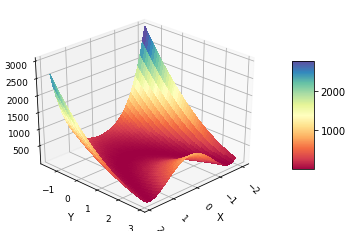

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Формирование сетки
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1.5, 3, 0.1)
X, Y = np.meshgrid(X, Y)
# Функция Розенброка
Z = (1.0 - X)**2 + 100.0 * (Y - X * X)**2
#
fig = plt.figure()
# Будем выводить 3d-проекцию графика функции
ax = fig.gca(projection = '3d')
# Вывод поверхности
surf = ax.plot_surface(X, Y, Z, cmap = cm.Spectral, linewidth = 0, antialiased = False)
# Метки осей координат
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Настройка оси X
for label in ax.xaxis.get_ticklabels():
    label.set_color('black')
    label.set_rotation(-45)
    label.set_fontsize(9)
# Настройка оси Y
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(9)
# Настройка оси Z
for label in ax.zaxis.get_ticklabels():
    label.set_fontsize(9)
# Изометрия
ax.view_init(elev = 30, azim = 45)
# Шкала цветов
fig.colorbar(surf, shrink = 0.5, aspect = 5)
# Отображение результата (рис. 1)
plt.show()

In [22]:
import numpy as np
import math # Для sqrt()
import scipy.optimize as opt
# Функция Розенброка
def Rosenbrock(X):
    return (1.0 - X[0])**2 + 100.0_8 * (X[1] - X[0] * X[0] )**2
#
n = 2
x0 = np.zeros(2, dtype = float) # Вектор с двумя элементами типа float
# Начальная точка поиска минимума функции
x0[0] = -5.0
x0[1] = 10.0
xtol = 1.0e-5 # Точность поиска экстремума
# Находим минимум функции
res = opt.minimize(Rosenbrock, x0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})
print(res)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 143
         Function evaluations: 269
 final_simplex: (array([[1.00000132, 1.0000028 ],
       [1.00000014, 0.99999997],
       [0.99999681, 0.99999355]]), array([4.38559817e-12, 9.00569749e-12, 1.05977059e-11]))
           fun: 4.385598172677925e-12
       message: 'Optimization terminated successfully.'
          nfev: 269
           nit: 143
        status: 0
       success: True
             x: array([1.00000132, 1.0000028 ])


In [23]:
import numpy as np
import math # Для sqrt()
import scipy.optimize as opt
# Функция Розенброка
def Rosenbrock(X):
    return (1.0 - X[0])**2 + 100.0_8 * (X[1] - X[0] * X[0] )**2
#
# Процедура формирования начального симплекса
def makeInitialSimplex(X, L, n, initialSimplex):
    qn = math.sqrt(1.0 + n) - 1.0
    q2 = L / math.sqrt(2.0) * n
    r1 = q2 * (qn + n)
    r2 = q2 * qn
    initialSimplex[0, :] = X
    for j in range(n):
        initialSimplex[j + 1, :] = X + r2
    for i in range(n):
        initialSimplex[i + 1, i] += (r1 - r2)
#
n = 2
x0 = np.zeros(2, dtype = float) # Вектор с двумя элементами типа float
# Начальная точка поиска минимума функции
x0[0] = -5.0
x0[1] = 10.0
xtol = 1.0e-5 # Точность поиска экстремума
# Начальная симплекс поиска минимума функции
initialSimplex = np.zeros((n + 1, n), dtype = float)
L = 0.4 # Длина ребра начального симплекса
# Формируем начальный симплекс
makeInitialSimplex(x0, L, n, initialSimplex)
# Находим минимум функции
res = opt.minimize(Rosenbrock, x0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True, 'initial_simplex': initialSimplex})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 138
         Function evaluations: 255
 final_simplex: (array([[1.00000168, 1.00000305],
       [0.99999702, 0.99999376],
       [0.99999679, 0.99999416]]), array([1.18711392e-11, 1.70297440e-11, 4.41663303e-11]))
           fun: 1.1871139195622139e-11
       message: 'Optimization terminated successfully.'
          nfev: 255
           nit: 138
        status: 0
       success: True
             x: array([1.00000168, 1.00000305])
